# Gymnasium?

* 강화 학습 에이전트 훈련을 위한 환경을 제공하는 Python API
    * 공식 홈페이지: https://gymnasium.farama.org/
* [Atari 게임](https://gymnasium.farama.org/environments/atari/), [Multi-Joint Dynamics with Contact (MoJoCo; 로봇 제어 환경)](https://gymnasium.farama.org/environments/mujoco/), [Box2D (Pygame 기반 게임)](https://gymnasium.farama.org/environments/box2d/) 등의 다양한 환경을 제공



# Installation

In [ ]:
%pip install pygame gymnasium numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 21.2 MB/s eta 0:00:00


* [pygame](https://www.pygame.org/news): Gymnasium에서 제공하는 환경을 시각적으로 렌더링하기 위한 라이브러리
* [gymnasium](https://gymnasium.farama.org/): Gymnasium 코어 라이브러리


# Basic Usage

## [gymnasium.make](https://gymnasium.farama.org/api/registry/#gymnasium.make)

강화 학습 에이전트를 훈련시킬 환경인 [gymnasium.Env](https://gymnasium.farama.org/api/env/) 인스턴스를 생성하는 함수로, 생성할 환경의 ID와 환경별로 사용되는 인자를 선언한다.

예를 들어, 다음과 같이 환경을 생성할 수 있다.

In [ ]:
import gymnasium as gym


env = gym.make(
    id=...,
    max_episode_steps=...,
    render_mode=...,
)

* **id**: 생성할 환경의 고유 구분자
* **max_episode_steps**: 한 에피소드에서 상호작용(상태-행동-보상)을 할 최대 횟수. 에피소드가 무한정 길어지는 것을 방지하기 위함
* **render_mode**: 환경의 상태를 시각적으로 표현하는 방법을 설정. 환경마다 다르긴 하지만, 보통 다음과 같은 값을 가짐:
  * **render_mode = "human"**: 실제 게임 화면을 반환 (주의: Colab 및 Jupyter Notebook에서는 실행 안 됨)
  * **render_mode = "rgb_array"**: 게임 화면을 이미지로 반환
  * **render_mode = "ansi"**: 게임 화면을 텍스트로 반환

보다 자세한 설명은 [Github](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/toy_text/frozen_lake.py)를 참조할 것.

## [gymnasium.Env](https://gymnasium.farama.org/api/env/)

Gymnasium의 핵심인 환경의 구현체.


### Key Functions

[gymnasium.Env](https://gymnasium.farama.org/api/env/)는 다음과 같은 핵심 함수를 가지고 있음:
* [Env.step(action)](https://gymnasium.farama.org/api/env/#gymnasium.Env.step): 환경에 행동을 수행한 후, 행동에 대한 보상과 상태를 반환하는 함수. 아래와 같이 여러 결과를 튜플로 반환:
    * **observation**: 행동으로 인해 전이된 새로운 상태
    * **reward**: 행동에 대한 보상
    * **terminated**: 종료 상태Terminal State 도달 여부를 반환
    * **truncated**: 한 에피소드의 최대 상호 작용 횟수(**gymnasium.make**의 **max_episode_steps**) 도달 여부를 반환
    * info: 그 외 환경에 대한 정보
* [Env.reset()](https://gymnasium.farama.org/api/env/#gymnasium.Env.reset): 환경을 초기 상태로 되돌리는 함수. 아래와 같이 여러 결과를 튜플로 반환
    * **observation**: 초기 상태
    * **info**: 그 외 환경에 대한 정보
* [Env.render()](https://gymnasium.farama.org/api/env/#gymnasium.Env.render): 에이전트가 인식하고 있는 환경의 상태를 시각화하여 반환하는 함수로, 환경 생성 시 입력한 **render_mode** 인자의 값에 따라 여러 값이 반환됨.
* [Env.close()](https://gymnasium.farama.org/api/env/#gymnasium.Env.close): 현재 환경을 종료.

### Attributes

위와 같은 핵심 함수 외에도, 환경에 대한 기본적인 정보를 알려주는 속성 또한 존재한다.
* [Env.action_space](https://gymnasium.farama.org/api/vector/#action_space): 환경에서 가능한 행동들의 공간을 반환
* [Env.observation_space](https://gymnasium.farama.org/api/vector/#observation_space): 환경의 상태 공간을 반환

# Example: Frozen Lake

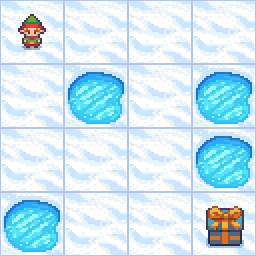

이번 튜토리얼에서는 얼음 구멍을 피해서 도착 지점에 도달하는 것이 목표인[FrozenLake-v1](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) 환경을 활용한다.

FrozenLake에서 기본적으로 제공하고 있는 환경도 있으나, 직접 환경을 제작할 수도 있다.


## Simple Map

먼저 FrozenLake의 기본 환경이 어떤지 시각적으로 확인해보자



array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
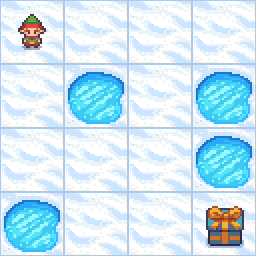

In [ ]:
import gymnasium as gym


env = gym.make(
    id='FrozenLake-v1',
    max_episode_steps=200,
    render_mode='rgb_array',
    map_name='4x4', # 기본적으로 탑재되어 있는 4x4 맵을 확인
    is_slippery=False, # 타일에서 미끄러지는 여부를 결정
)
env.reset() # 환경 시작 전에 항상 reset()을 호출해야 함
env.render()

여기서 우측으로 1회 움직여보자.

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
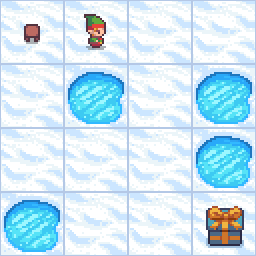

In [ ]:
from gymnasium.envs.toy_text import frozen_lake


env.step(frozen_lake.RIGHT)
env.render()

각각 행동 공간과 상태 공간이 어떤지도 확인해보자.

In [ ]:
print('Action space: ', env.action_space)
print('State space: ', env.observation_space)

Action space:  Discrete(4)
State space:  Discrete(16)


## Custom Map Generation

지난 시간에 배운 Dynamic Programming을 통한 정책 학습을 위해서는 환경의 상태를 알아야 한다. 따라서, FrozenLake에서 제공하는 기본 맵 대신에, 직접 맵을 생성해보겠다.

In [ ]:
import numpy as np


CUSTOM_MAP = [
    "SFFFFFFH",
    "FFHFFFFF",
    "FFFHFFFF",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHHFFFHF",
    "FHFFHFHF",
    "FFFHFFFG",
]
CUSTOM_MAP = np.array(CUSTOM_MAP, dtype='c')
CUSTOM_MAP

array([[b'S', b'F', b'F', b'F', b'F', b'F', b'F', b'H'],
       [b'F', b'F', b'H', b'F', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'F', b'H', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'F', b'F', b'F', b'H', b'F', b'F'],
       [b'F', b'F', b'F', b'H', b'F', b'F', b'F', b'F'],
       [b'F', b'H', b'H', b'F', b'F', b'F', b'H', b'F'],
       [b'F', b'H', b'F', b'F', b'H', b'F', b'H', b'F'],
       [b'F', b'F', b'F', b'H', b'F', b'F', b'F', b'G']], dtype='|S1')

각 글자는 다음을 의미한다:
* **S**: 시작 지점
* **G**: 도착 지점
* **F**: 일반 타일
* **H**: 얼음 구멍 타일 (빠지면 게임 오버)

시각적으로 확인해보자:

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
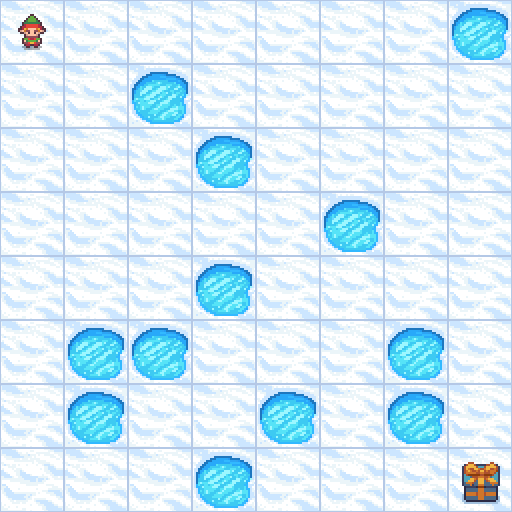

In [ ]:
import gymnasium as gym


env = gym.make(
    id='FrozenLake-v1',
    max_episode_steps=200,
    render_mode='rgb_array',
    desc=CUSTOM_MAP, # 방금 제작한 맵을 사용
    is_slippery=False, # 타일에서 미끄러지는 여부를 결정
)
env.reset()
env.render()

## Agent

그럼, 이제 위와 같은 맵에서 얼음 구멍에 빠지지 않고 출발점에서 도착점까지 가는 에이전트를 만들어보자.

먼저, 에이전트의 기본 뼈대를 추상화 클래스로 선언한다.

In [ ]:
from abc import ABC, abstractmethod
import gymnasium as gym
from gymnasium.envs.toy_text import frozen_lake


class FrozenLakeAgent(ABC):
    LEFT = frozen_lake.LEFT
    DOWN = frozen_lake.DOWN
    RIGHT = frozen_lake.RIGHT
    UP = frozen_lake.UP

    ACTIONS = [LEFT, DOWN, RIGHT, UP]

    DIR_COORD = {
        LEFT: (0, -1),
        DOWN: (1, 0),
        RIGHT: (0, 1),
        UP: (-1, 0)
    }

    # 주어진 상태에 대해서 행동을 수행하는 함수
    @abstractmethod
    def act(self, state) -> int:
        pass

    # 주어진 에피소드 횟수만큼 환경과 상호작용 하는 함수
    def run(self, n_episodes: int, env: gym.Env):
        for i in range(n_episodes):
            state, info = env.reset()

            while True:
                action = self.act(state)
                state, reward, terminated, truncated, info = env.step(action)
                if terminated or truncated:
                    break
        env.close()

### Random Agent


위와 같은 뼈대를 바탕으로, 무작위로 움직이는 에이전트를 만들어보자.

In [ ]:
import numpy as np


class RandomAgent(FrozenLakeAgent):
    def __init__(self, seed: int = None):
        super().__init__()
        self.rng = np.random.default_rng(seed)

    def act(self, state):
        return self.rng.choice(self.ACTIONS)

다음과 같이 간단하게 실행해 볼 수 있다.

In [ ]:
agent = RandomAgent(seed=42)
agent.run(n_episodes=5, env=env)

아무런 화면이 나타나지 않는 건 당연한 일이다. 실시간으로 움직이는 것을 보고 싶다면, **gymnasium.make**에서 **render_mode**를 **human**으로 두고, Colab 또는 Jupyter Notebook이 아닌 일반 환경에서 실행해야 한다.



### Value Iteration

무작위로 행동을 선택하는 대신, Value Iteration을 활용해서 최적의 정책을 학습해보자.

In [ ]:
import numpy as np
from itertools import product


class ValueIterationAgent(FrozenLakeAgent):
    def __init__(self, desc: np.ndarray, phi: float = 1e-3, n_steps: int = 1000, gamma=0.99, init_V: float = 0):
        self.desc = desc
        self.phi = phi
        self.n_steps = n_steps
        self.gamma = gamma
        self.init_V = init_V

        self.rows, self.cols = self.desc.shape
        self.V = None
        self.PI = None

    # 새로운 상태 가치 함수를 추정하는 함수
    def estimate_state_value(self, V, row, col, action):
        d_row, d_col = self.DIR_COORD[action]
        row = np.clip(row + d_row, 0, self.rows - 1)
        col = np.clip(col + d_col, 0, self.cols - 1)

        # 기본적으로 1회 이동 시 마다 -1의 보상을 준다.
        # 즉, 최대한 도착 지점까지 빨리 도착해야 한다는 것이다.
        reward = -1
        # 만약 구덩이에 빠진다면, -100의 보상을 줘서
        # 구덩이를 회피하도록 하겠다.
        if self.desc[row, col] == b'H':
            reward = -100
        # 도착 지점에는 0의 보상을 준다.
        if self.desc[row, col] == b'G':
            reward = 0
        return reward + self.gamma * V[row, col]

    # 최적의 정책을 학습하는 함수
    def fit(self):
        # 상태 가치 함수 값을 초기화
        V = np.zeros((self.rows, self.cols)) + self.init_V
        # Terminal State의 상태 가치 함수는 0
        V[self.desc == b'G'] = 0

        PI = np.zeros((self.rows, self.cols), dtype=int)

        for step in range(self.n_steps):
            delta = 0
            # 각 상태에 대해서 상태 가치 함수에 대한 벨만 최적 방정식을 계산
            for row, col in product(range(self.rows), range(self.cols)):
                prev_V = V[row, col]
                max_V = -np.inf
                # 벨만 최적 방정식
                for action in self.ACTIONS:
                    new_V = self.estimate_state_value(V, row, col, action)
                    max_V = max(max_V, new_V)
                V[row, col] = max_V
                delta = max(delta, np.abs(prev_V - max_V))
            # 수렴했다면 종료
            if delta < self.phi:
                break

        # 각 상태에 대해서 최적의 행동을 선택
        for row, col in product(range(self.rows), range(self.cols)):
            max_V = -np.inf
            max_action = -1
            for action in self.ACTIONS:
                v = self.estimate_state_value(V, row, col, action)
                if max_V < v:
                    max_V = v
                    max_action = action
            PI[row, col] = max_action

        self.V = V
        self.PI = PI
        return self

    def act(self, state):
        row, col = state // self.rows, state % self.cols
        return self.PI[row, col].astype(int)

그럼, 한번 학습을 해보자.

In [ ]:
agent = ValueIterationAgent(desc=CUSTOM_MAP).fit()

과연 어떤 정책을 학습했을까? Colab 상에서 확인해보자.

In [ ]:
import copy
from itertools import product


pi = copy.copy(CUSTOM_MAP).astype('str')
rows, cols = pi.shape
arrows = {
    ValueIterationAgent.LEFT: '←',
    ValueIterationAgent.DOWN: '↓',
    ValueIterationAgent.RIGHT: '→',
    ValueIterationAgent.UP: '↑',
}
for row, col in product(range(rows), range(cols)):
    pi[row, col] = arrows[agent.PI[row, col]]

pi

array([['↓', '↓', '→', '↓', '↓', '↓', '↓', '↓'],
       ['↓', '↓', '↓', '→', '↓', '↓', '↓', '↓'],
       ['↓', '↓', '↓', '↓', '↓', '→', '↓', '↓'],
       ['→', '→', '→', '→', '↓', '↓', '↓', '↓'],
       ['→', '→', '↑', '↓', '↓', '↓', '→', '↓'],
       ['↓', '↑', '→', '→', '→', '↓', '→', '↓'],
       ['↓', '→', '→', '↑', '↓', '↓', '↓', '↓'],
       ['→', '→', '↑', '→', '→', '→', '→', '↓']], dtype='<U1')

과연 얼음 구멍을 피해서 도착지점까지 갈 수 있는지 다음 맵에서 확인해보자.

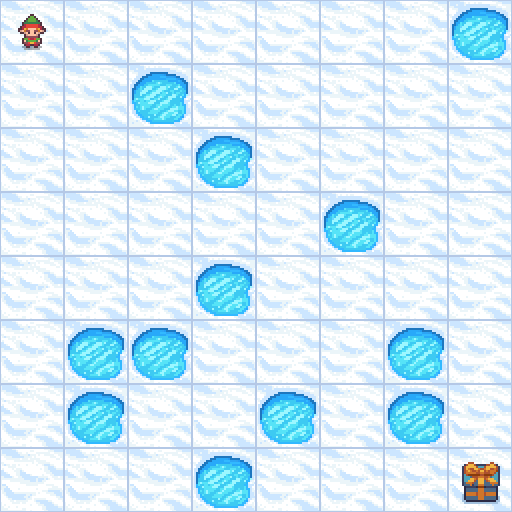

### Policy Iteration

이번에는 Policy Evaluation과 Policy Improvement를 반복하는 Policy Iteration 활용해보자.

In [ ]:
import numpy as np
from itertools import product


class PolicyIterationAgent(FrozenLakeAgent):
    def __init__(self, desc: np.ndarray, phi: float = 1e-3, n_iters: int = 1000, gamma=0.99, init_V: float = 0, seed: int = None):
        self.desc = desc
        self.phi = phi
        self.n_iters = n_iters
        self.gamma = gamma
        self.init_V = init_V
        self.seed = seed

        self.rows, self.cols = self.desc.shape
        self.V = None
        self.PI = None
        self.histories = []

    def estimate_state_value(self, V, row, col, action):
        d_row, d_col = self.DIR_COORD[action]
        row = np.clip(row + d_row, 0, self.rows - 1)
        col = np.clip(col + d_col, 0, self.cols - 1)

        reward = -1
        if self.desc[row, col] == b'H':
            reward = -100
        if self.desc[row, col] == b'G':
            reward = 0
        return reward + self.gamma * V[row, col]

    # 현재 정책의 가치를 평가한다.
    def policy_evaluation(self, PI):
        V = np.zeros((self.rows, self.cols)) + self.init_V
        V[self.desc == b'G'] = 0

        for i in range(self.n_iters):
            delta = 0
            for row, col in product(range(self.rows), range(self.cols)):
                prev_V = V[row, col]
                action = PI[row, col].astype(int)
                new_V = self.estimate_state_value(V, row, col, action)
                delta = max(delta, np.abs(prev_V - new_V))
                V[row, col] = new_V

            if delta < self.phi:
                break
        return V

    # 상태 가치 함수로부터 더 나은 정책을 만든다.
    def policy_improvement(self, V):
        PI = np.zeros((self.rows, self.cols), dtype=int)

        for row, col in product(range(self.rows), range(self.cols)):
            max_V = -np.inf
            max_action = -1
            for action in self.ACTIONS:
                v = self.estimate_state_value(V, row, col, action)
                if max_V < v:
                    max_V = v
                    max_action = action
            PI[row, col] = max_action

        return PI

    def fit(self):
        rng = np.random.default_rng(self.seed)
        # 초기에는 무작위 정책을 만든다.
        PI = rng.choice(self.ACTIONS, size=(self.rows, self.cols))
        self.histories.clear()

        for i in range(self.n_iters):
            V = self.policy_evaluation(PI)
            self.histories.append((copy.copy(PI), copy.copy(V)))

            new_PI = self.policy_improvement(V)

            # 새로 만든 정책이 이전 정책과 차이가 없다면 종료한다.
            if np.sum(new_PI != PI) == 0:
                self.V = V
                self.PI = copy.copy(new_PI)
                break
            PI = copy.copy(new_PI)

        return self

    def act(self, state):
        row, col = state // self.rows, state % self.cols
        return self.PI[row, col].astype(int)

그럼, 한번 학습을 해보자.

In [ ]:
agent = PolicyIterationAgent(desc=CUSTOM_MAP).fit()

과연 어떤 정책을 학습했을까? Colab 상에서 확인해보자.

In [ ]:
import copy
from itertools import product


pi = copy.copy(CUSTOM_MAP).astype('str')
rows, cols = pi.shape
arrows = {
    PolicyIterationAgent.LEFT: '←',
    PolicyIterationAgent.DOWN: '↓',
    PolicyIterationAgent.RIGHT: '→',
    PolicyIterationAgent.UP: '↑',
}
for row, col in product(range(rows), range(cols)):
    pi[row, col] = arrows[agent.PI[row, col]]

pi

array([['↓', '↓', '→', '↓', '↓', '↓', '↓', '↓'],
       ['↓', '↓', '↓', '→', '↓', '↓', '↓', '↓'],
       ['↓', '↓', '↓', '↓', '↓', '→', '↓', '↓'],
       ['→', '→', '→', '→', '↓', '↓', '↓', '↓'],
       ['→', '→', '↑', '↓', '↓', '↓', '→', '↓'],
       ['↓', '↑', '→', '→', '→', '↓', '→', '↓'],
       ['↓', '→', '→', '↑', '↓', '↓', '↓', '↓'],
       ['→', '→', '↑', '→', '→', '→', '→', '↓']], dtype='<U1')

마찬가지로  얼음 구멍을 피해서 도착지점까지 갈 수 있는지 다음 맵에서 확인해보자.

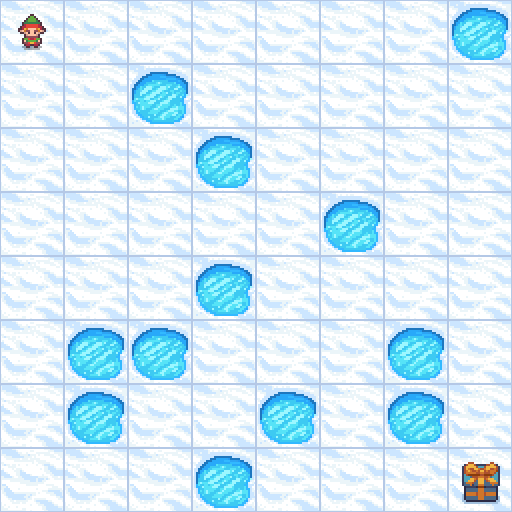

시각적으로 확인해보고 싶다면, 위에서 구현한 코드들을 Colab 또는 Jupyter Notebook이 아닌 환경에서 실행해보면 된다.